In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector

In [2]:
#Quantum Fourier Transform
def QFT(q_circuit, n):
    q_circuit.barrier()
    for k in range(n):
        q_circuit.h(k)
        for i in range(k + 1, n):
            q_circuit.cp(np.pi / (2 ** (i - k)), k, i)
        q_circuit.barrier()
        
    #Swap of all of qubits
    for l in range(n//2):
        q_circuit.swap(l, n - 1 - l)
    q_circuit.barrier()

In [3]:
#Quantum Fourier Transform Inverse
def QFT_I(q_circuit, n):
    #Swap of all of qubits
    for l in range(n//2):
        q_circuit.swap(l, n - 1 - l)
    q_circuit.barrier()
    
    for k in range(n):
        for i in range(k):
            q_circuit.cp(- np.pi / (2 ** (k - i)), n - k - 1, n - i - 1)
        q_circuit.h(n - k - 1)
        q_circuit.barrier()

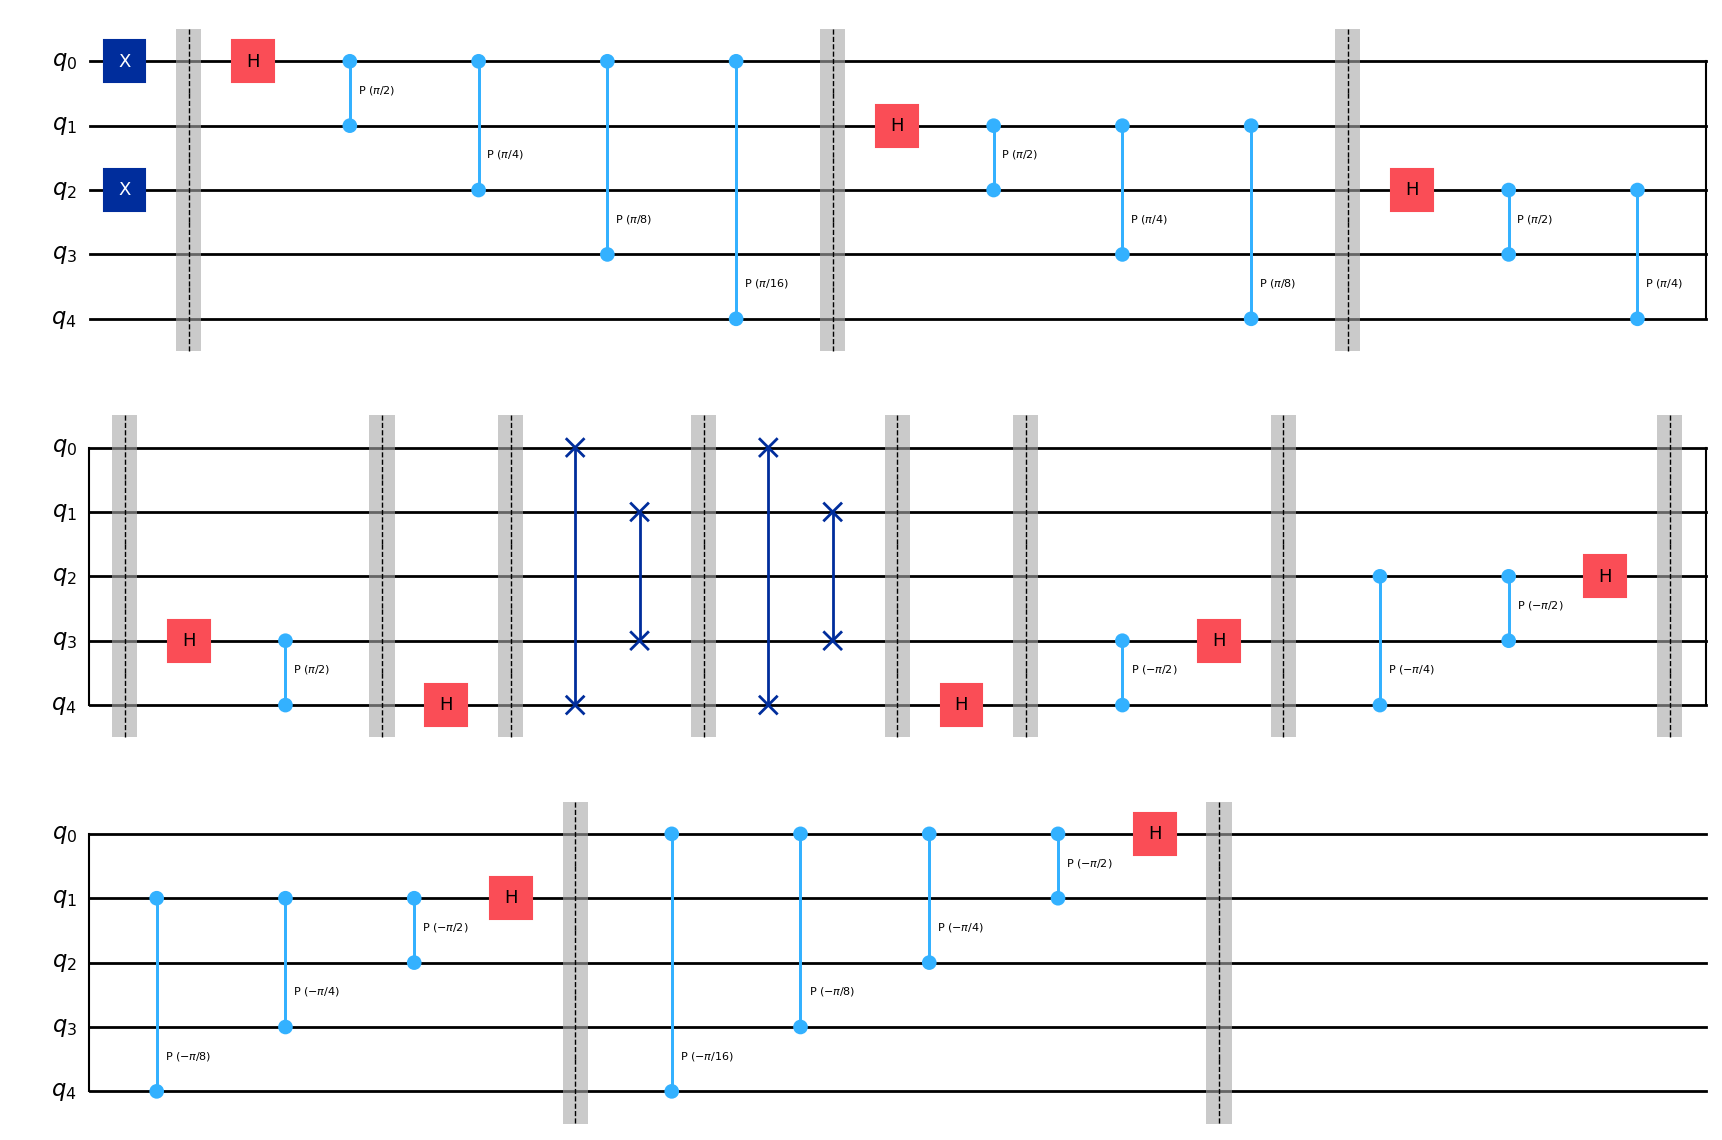

In [4]:
#number of qubits
n = 5

#define the circuit
qc = QuantumCircuit(n)

#State inicialization
qc.x(0)
qc.x(2)

#Get the state vector
state_0 = Statevector(qc)

#--------------------------------------------
#QFT
QFT(qc, n)

#Get the state vector
state_1 = Statevector(qc)

#--------------------------------------------
#QFT inverse
QFT_I(qc, n)

#Get the state vector
state_2 = Statevector(qc)

#draw the circuit
qc.draw('mpl')

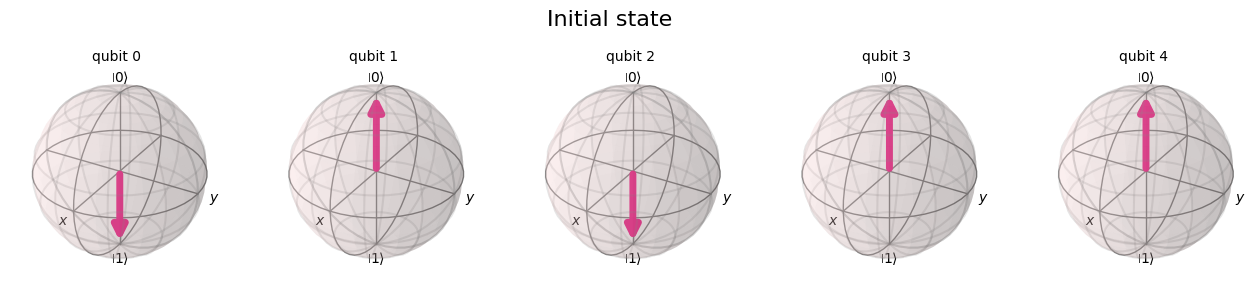

In [5]:
#Bloch sphere of each qubit of the initial state
plot_bloch_multivector(state_0, title = 'Initial state')

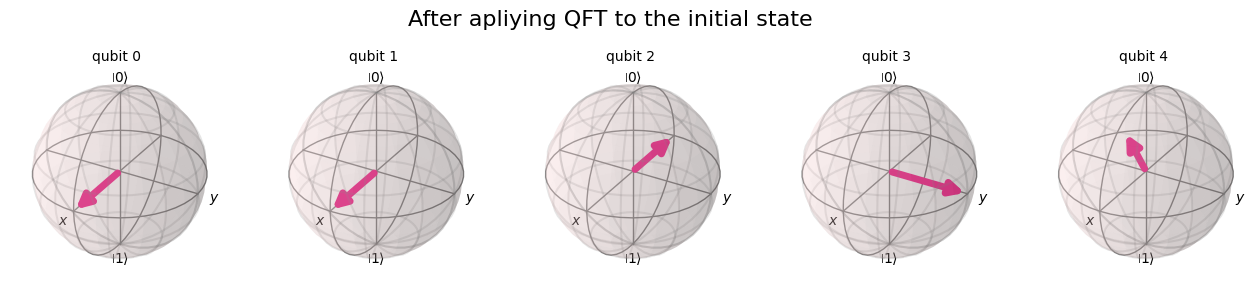

In [6]:
#Bloch sphere of each qubit after apliying QFT to the initial state
plot_bloch_multivector(state_1, title = 'After apliying QFT to the initial state')

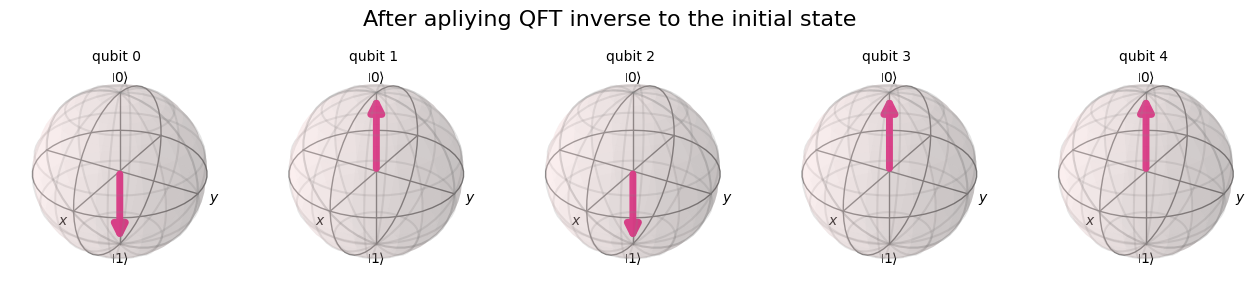

In [7]:
#Bloch sphere of each qubit after apliying QFT inverse to the initial state (The initial state has been recovered)
plot_bloch_multivector(state_2, title = 'After apliying QFT inverse to the initial state')